**Template Matching in OpenCV**

So khớp mẫu (Template Matching) là phương pháp tìm kiếm và tìm vị trí của hình ảnh mẫu trong hình ảnh lớn hơn. OpenCV đi kèm với hàm cv2.matchTemplate() cho mục đích này. Nó chỉ đơn giản là trượt hình ảnh mẫu lên hình ảnh đầu vào (như trong tích chập 2D) và so sánh mẫu và bản vá của hình ảnh đầu vào dưới hình ảnh mẫu. Nó trả về một hình ảnh thang độ xám, trong đó "mỗi pixel biểu thị vùng lân cận của pixel đó khớp với mẫu đến mức nào".

Nếu hình ảnh đầu vào có kích thước (WxH) và hình ảnh mẫu có kích thước (wxh), hình ảnh đầu ra sẽ có kích thước (W-w+1, H-h+1). Sau khi nhận được kết quả, có thể sử dụng hàm cv2.minMaxLoc() để tìm giá trị tối đa/tối thiểu ở đâu. Lấy nó làm góc trên bên trái của hình chữ nhật và lấy (w,h) làm chiều rộng và chiều cao của hình chữ nhật. Hình chữ nhật đó là vùng mẫu.

result = cv2.matchTemplate(image, template, method)
--> image: hình ảnh đầu vào
--> template: hình ảnh khuôn mẫu
--> method: phương pháp sử dụng để so khớp
- cv2.TM_SQDIFF: So sánh bằng bình phương sự khác biệt. Kết quả trả về là giá trị nhỏ nhất --> R(x,y) = ∑(x',y')(T(x',y')-I(x+x',y+y'))^2
- cv2.TM_SQDIFF_NORMED: So sánh bằng bình phương sự khác biệt chuẩn hóa.
- cv2.TM_CCORR: So sánh bằng cách tính toán tổng của tích chập giữa giá trị pixel của khuôn mẫu và hình ảnh tại mỗi vị trí. Kết quả càng lớn, sự khớp càng tốt. --> R(x,y) = ∑(x',y') (T(x',y') * I(x+x',y+y'))
- cv2.TM_CCORR_NORMED: So sánh bằng cách tính toán tổng của tích chập chuẩn hóa giữa giá trị pixel của khuôn mẫu và hình ảnh tại mỗi vị trí. Kết quả nằm trong phạm vi [−1,1], càng gần 1, sự khớp càng tốt.
- cv2.TM_CCOEFF: So sánh bằng cách tính toán hệ số tương quan giữa giá trị pixel của khuôn mẫu và hình ảnh tại mỗi vị trí, sau khi trừ đi giá trị trung bình của mỗi hình ảnh. Kết quả càng lớn, sự khớp càng tốt. --> R(x,y) = ∑(x',y') (T(x',y') - μT) * (I(x+x',y+y') - μI)
- cv2.TM_CCOEFF_NORMED: So sánh bằng cách tính toán hệ số tương quan chuẩn hóa giữa giá trị pixel của khuôn mẫu và hình ảnh tại mỗi vị trí, sau khi trừ đi giá trị trung bình của mỗi hình ảnh. Kết quả nằm trong phạm vi [−1,1], càng gần 1, sự khớp càng tốt.

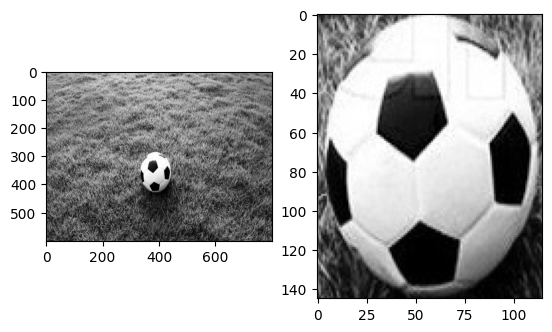

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('backprojection.jpg',0)
img2 = img.copy()
template = img[285:430, 330:445]
w, h = template.shape[::-1]

plt.subplot(121); plt.imshow(img, cmap='gray')
plt.subplot(122); plt.imshow(template, cmap='gray')

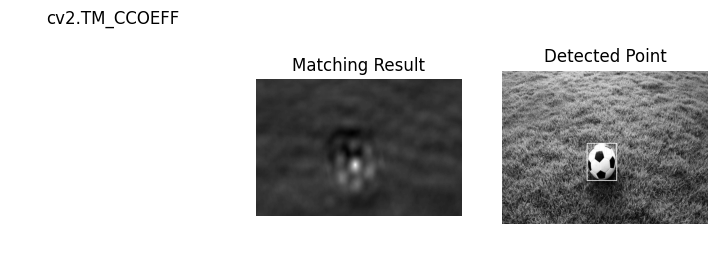

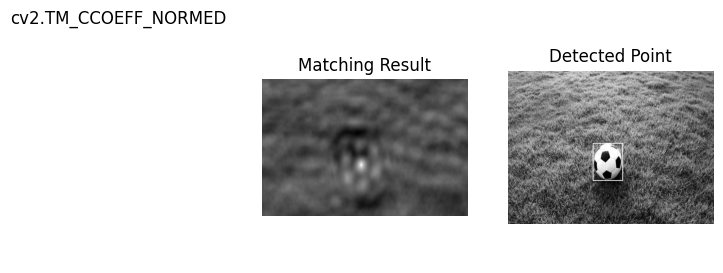

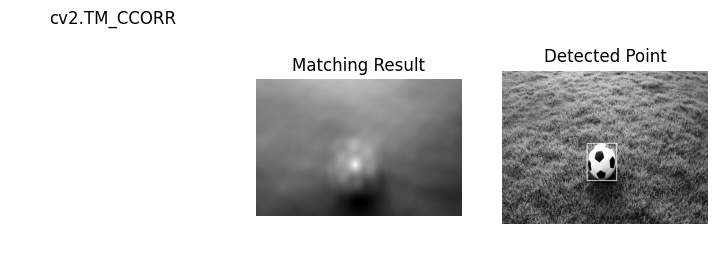

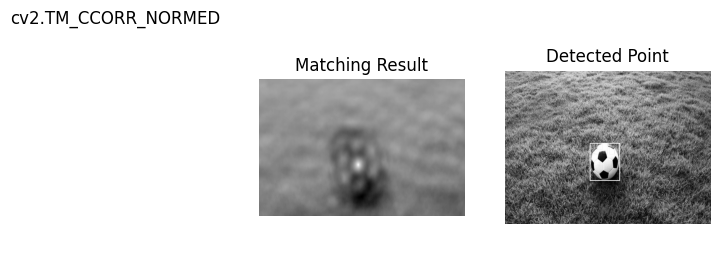

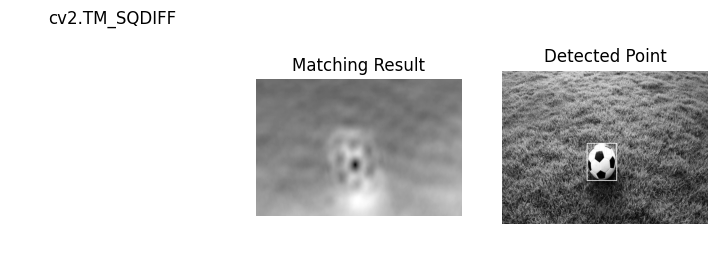

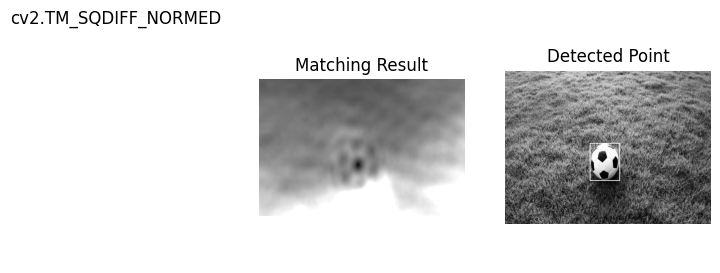

In [2]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    plt.figure(figsize=[9,3])
    plt.subplot(131), plt.title(meth), plt.axis('off')
    plt.subplot(132), plt.imshow(res, cmap = 'gray')
    plt.title('Matching Result'); plt.axis('off')
    plt.subplot(133), plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'); plt.axis('off')

    plt.show()

**Template Matching with Multiple Objects**

Nếu như trong ảnh có nhiều vị trí object phù hợp template thì chúng ta khổng thể sử dụng trực tiếp kết quả mà hàm cv2.matchTemplate() vì nó chỉ đưa ra giá trị min và max tức là cho 1 kết quả so khớp. Vì vậy, để xác định được nhiều đối tượng, ta sử dụng các method chuẩn hóa 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF_NORMED' khi đó các kết quả thu được đều nằm trong khoảng giá trị từ [-1, 1]. Lúc này, ta kết hợp với ngưỡng (thresh) để lấy được tập hợp các đối tượng so khớp.

(145, 115)


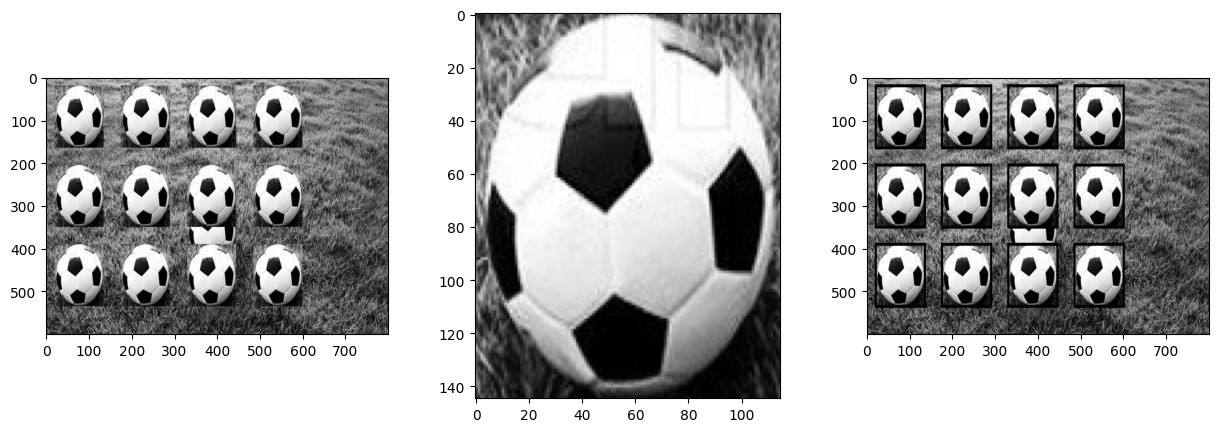

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('backprojection.jpg',0)
img2 = img.copy()
template = img[285:430, 330:445]
w, h = template.shape[::-1]
print(template.shape)

for i in range(4):
    for j in range(4):
        y = j*h + j*40 + 20
        x = i*w + i*40 + 20
        if y + h <= img2.shape[0] and x + w <= img2.shape[1]:
            img2[y : y + h, x : x + w] = template

plt.figure(figsize=[15,5])
plt.subplot(131); plt.imshow(img2, cmap='gray')
plt.subplot(132); plt.imshow(template, cmap='gray')

res = cv2.matchTemplate(img2, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.9
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
    
plt.subplot(133); plt.imshow(img2, cmap='gray')